## Script para ler os reports em json do fastp e plotar um histograma

In [31]:
import json
import glob
import sys
import os
import re
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Arquivo teste para pegar os dados em json

In [4]:
with open('/home/boralli/workdir/pipeline_v4/LOGS/FASTP_LOG/R2809_D2A01ACXX_TAATGCGC_L005_.json') as f:
    exemplo = json.load(f)
    
#for i in exemplo['summary']['after_filtering']['total_reads']:
#     print (i)
print (exemplo['summary'])
#print (exemplo)

{'before_filtering': {'total_reads': 36746246, 'total_bases': 3674624600, 'q20_bases': 3476966256, 'q30_bases': 3269362255, 'q20_rate': 0.94621, 'q30_rate': 0.889713, 'read1_mean_length': 100, 'read2_mean_length': 100, 'gc_content': 0.469739}, 'after_filtering': {'total_reads': 34476986, 'total_bases': 3440409902, 'q20_bases': 3331805575, 'q30_bases': 3147328337, 'q20_rate': 0.968433, 'q30_rate': 0.914812, 'read1_mean_length': 99, 'read2_mean_length': 99, 'gc_content': 0.467833}}


In [16]:
path = '/home/boralli/workdir/pipeline_v4/LOGS/FASTP_LOG/'

In [6]:
list_values = []
for filename in glob.glob(os.path.join(path, '*.json')):
    with open(filename) as f:
        file = json.load(f)
        list_values.append(file['summary']['after_filtering']['total_reads'])
        #print (file['summary']['after_filtering']['total_reads'])
        
print (list_values)

[44922898, 40170560, 61735512, 145948014, 94062824, 64385444, 84349144, 34304004, 46550114, 60779562, 41611692, 39868556, 21055152, 39514256, 21249862, 74909876, 44331118, 85602402, 47052796, 10340662, 82710414, 82079232, 82948894, 49725670, 75619842, 6368936, 168853740, 101533784, 92637684, 22550392, 50963660, 53037644, 65115856, 88409572, 36614926, 106772742, 63456598, 54853280, 20230422, 20726116, 23568256, 68803962, 113880898, 30925730, 51145728, 47784376, 57602716, 25633320, 88043462, 85348844, 109316596, 97349240, 23120528, 27424338, 31767848, 76126324, 28059916, 47451334, 27335168, 19271338, 53303804, 12391034, 68772954, 55372652, 79026002, 44011608, 12097184, 74484338, 75526196, 66672846, 44172850, 110495048, 49386500, 45095796, 69867182, 91841880, 53893556, 40987462, 29825876, 59136464, 27278138, 94353864, 151586488, 15132878, 165897704, 64004222, 73178968, 24544954, 62490302, 10460292, 46622242, 30495200, 53913606, 103797148, 17072272, 78913634, 102336478, 68853518, 30471330,

In [ ]:
lista_ids = []
for filename in glob.glob(os.path.join(path, '*.json')):
    regexList = re.findall('R\d\d\d\d_', filename)
    print (regexList)
    lista_ids.extend(regexList)
    
print (lista_ids)

In [30]:
#Criando um dicionario
dicionario = dict(zip(lista_ids, list_values))
# print (dicionario)
for key, value in dicionario.items():
    if value < 30000000:
        print (key, value)

R4010_ 21055152
R3395_ 21249862
R4357_ 10340662
R2962_ 6368936
R4179_ 22550392
R4424_ 20230422
R4235_ 20726116
R4175_ 23568256
R3673_ 25633320
R3555_ 23120528
R4227_ 27424338
R3978_ 28059916
R3996_ 27335168
R3646_ 19271338
R2836_ 12391034
R5627_ 12097184
R3016_ 29825876
R2948_ 27278138
R3611_ 15132878
R4326_ 24544954
R5863_ 10460292
R3506_ 17072272
R4362_ 13655126
R3602_ 12018798
R4225_ 28359628
R3935_ 21817672
R2945_ 24316876
R4048_ 23620078
R5623_ 18285308
R3375_ 2620908
R2896_ 11726516
R5592_ 28778550
R2890_ 28014882
R3929_ 25189330
R3991_ 27360188
R4203_ 26133194
R3901_ 22117434
R4420_ 15491672
R5597_ 24375526
R3985_ 27085998
R4112_ 24372724


In [35]:
df_ids = pd.DataFrame(list(dicionario.items()), columns=['IDs', 'TotalReads'])
df_ids.sort_values(by=['IDs'], inplace=True)
df_ids.to_csv('/home/boralli/workdir/pipeline_v4/LOGS/samples_30kkreads.csv')

In [45]:
print (len(list_values))
lower_30 = []
for i in list_values:
    if i < 30000000:
        lower_30.append(i)
print (lower_30)
print (len(lower_30))

169
[21055152, 21249862, 10340662, 6368936, 22550392, 20230422, 20726116, 23568256, 25633320, 23120528, 27424338, 28059916, 27335168, 19271338, 12391034, 12097184, 29825876, 27278138, 15132878, 24544954, 10460292, 17072272, 13655126, 12018798, 28359628, 21817672, 24316876, 23620078, 18285308, 2620908, 11726516, 28778550, 28014882, 25189330, 27360188, 26133194, 22117434, 15491672, 24375526, 27085998, 24372724]
41


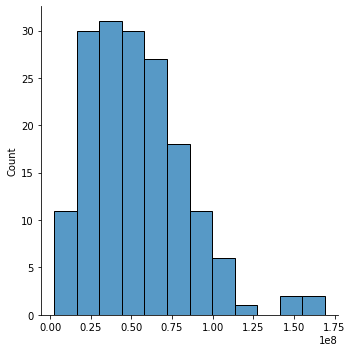

In [49]:
sns.displot(list_values)


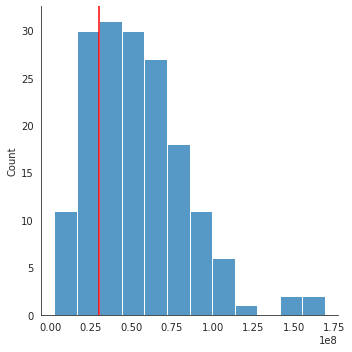

In [59]:
sns.displot(list_values)
plt.axvline(x=30000000, c="red")

plt.show()

In [37]:
#Reading csv
csv = pd.read_csv('/home/boralli/workdir/pipeline_v4/ANALYSES/samples_30kkreads.csv')

,IDs,TotalReads,Passed?,Phenotype
0,R2809,34476986,Yes,Schizo
1,R2826,60779562,Yes,Control
2,R2828,82079232,Yes,Schizo
3,R2834,68803962,Yes,Schizo
4,R2836,12391034,No,Control
...,...,...,...,...
164,R5863,10460292,No,Control
165,R5868,31767848,Yes,Control
166,R5885,62490302,Yes,Control
167,R6533,40170560,Yes,Schizo


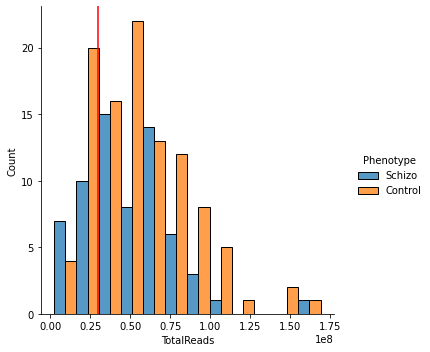

In [51]:
sns.displot(csv,x = 'TotalReads', hue='Phenotype', multiple="dodge")
plt.axvline(x=30000000, c="red")

plt.show()

In [56]:
csv.groupby(['Passed?']).count()


,IDs,TotalReads,Phenotype
Passed?,,,
No,41,41,41
Yes,128,128,128


In [60]:
csv_passed = csv[csv['Passed?']=='Yes']
csv_passed.groupby(['Phenotype']).count()

,IDs,TotalReads,Passed?
Phenotype,,,
Control,80,80,80
Schizo,48,48,48
